Paso 1: Configurar el entorno
Primero, asegúrate de tener instaladas las librerías necesarias. Puedes hacerlo ejecutando los siguientes comandos en tu terminal o en una celda de Jupyter Notebook:

In [ ]:
!pip install pandas google-cloud-bigquery scipy


Paso 2: Realizar Autenticacion




In [ ]:
from google.colab import auth
auth.authenticate_user()

Conectar a Bigquery e importar librerias

In [ ]:
from google.cloud import bigquery
import pandas as pd

Define tu proyecto, dataset y tabla aquí

In [ ]:
project_id = "labproyecto2-hipotesis"
dataset = "Dataset"
table = "vista_quartiles_categoria"

Crea un cliente de BigQuery autenticado para el proyecto especificado.

In [ ]:
client = bigquery.Client(project="labproyecto2-hipotesis")

Define una cadena de consulta SQL utilizando una cadena formateada (f-string) de Python. "Categoria Danceability"

In [ ]:
query = """
SELECT c_Danceability, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_danceability IN ('alto', 'bajo')
"""


Ejecutar consulta y convertir resultados en un DataFrame de pandas

In [ ]:
df = client.query(query).to_dataframe()

Mostrar las primeras filas del DataFrame

In [ ]:
print(df.head())

  cat_danceability  streams_numerico
0             bajo        1297026226
1             bajo        1355959075
2             bajo         786181836
3             bajo        1755214421
4             bajo        1592909789


Test Wilcoxon
Preparar los datos:


In [ ]:
streams_alto = df[df['cat_danceability'] == 'alto']['streams_numerico']
streams_bajo = df[df['cat_danceability'] == 'bajo']['streams_numerico']
min_length = min(len(streams_alto), len(streams_bajo))
streams_alto = streams_alto[:min_length]
streams_bajo = streams_bajo[:min_length]

Aplicar el test de Wilcoxon:

In [ ]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(streams_alto, streams_bajo)
print(f'Estadístico de la prueba: {stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 11395.0
Valor p: 0.013703012841444151
Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.


Test T


Conectar a Bigquery e importar librerias

In [ ]:
from scipy.stats import ttest_ind

Mostrar tipo de dato

In [ ]:
print(df.dtypes)

cat_danceability    object
streams_numerico     Int64
dtype: object


Ejecutar consulta y convertir resultados en un DataFrame de pandas

In [ ]:
df['streams_numerico'] = pd.to_numeric(df['streams_numerico'], errors='coerce')

Eliminar filas con valores nulos en 'streams'

In [ ]:
df = df.dropna(subset=['streams_numerico'])

Separa los datos en dos series basadas en la categoría

In [ ]:
streams_alto = df[df['cat_danceability'] == 'alto']['streams_numerico']
streams_bajo = df[df['cat_danceability'] == 'bajo']['streams_numerico']

Verificar el contenido de las series

In [ ]:
print("Datos de streams_alto:")
print(streams_alto.head())
print("Datos de streams_bajo:")
print(streams_bajo.head())


Datos de streams_alto:
13    1687664027
24    1424589568
46    1062345656
49    1210599487
50     843309044
Name: streams_numerico, dtype: Int64
Datos de streams_bajo:
0    1297026226
1    1355959075
2     786181836
3    1755214421
4    1592909789
Name: streams_numerico, dtype: Int64


Asegurarse de que las series son de tipo flotante

In [ ]:
streams_alto = streams_alto.astype(float)
streams_bajo = streams_bajo.astype(float)

Aplica el test T

In [ ]:
t_stat, p_value = ttest_ind(streams_alto, streams_bajo, equal_var=False)  # equal_var=False si no se asume varianza igual

Interpreta el resultado

In [ ]:
print(f'Estadístico de la prueba: {t_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')


Estadístico de la prueba: -3.1075278881497552
Valor p: 0.001996301247206946
Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.


Valence

In [ ]:
query = """
SELECT cat_valence, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_valence IN ('alto', 'bajo')
"""

Ejecutar consulta y convertir resultados en un DataFrame de pandas

In [ ]:
df = client.query(query).to_dataframe()

Mostrar las primeras filas del DataFrame

In [ ]:
print(df.head())

  cat_valence  streams_numerico
0        bajo        1297026226
1        bajo        1355959075
2        bajo         786181836
3        bajo        1755214421
4        bajo        1592909789


Test Wilcoxon
Preparar los datos:

In [ ]:
streams_alto = df[df['cat_valence'] == 'alto']['streams_numerico']
streams_bajo = df[df['cat_valence'] == 'bajo']['streams_numerico']
min_length = min(len(streams_alto), len(streams_bajo))
streams_alto = streams_alto[:min_length]
streams_bajo = streams_bajo[:min_length]

Aplicar el test de Wilcoxon:

In [ ]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(streams_alto, streams_bajo)
print(f'Estadístico de la prueba: {stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 11966.0
Valor p: 0.054718654340041556
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


Test T

Conectar a Bigquery e importar librerias

In [ ]:
from scipy.stats import ttest_ind

Mostrar tipo de dato

In [ ]:
print(df.dtypes)

cat_danceability    object
streams_numerico     Int64
dtype: object


Ejecutar consulta y convertir resultados en un DataFrame de pandas

In [ ]:
df['streams_numerico'] = pd.to_numeric(df['streams_numerico'], errors='coerce')

Eliminar filas con valores nulos en 'streams'

In [ ]:
df = df.dropna(subset=['streams_numerico'])

Separa los datos en dos series basadas en la categoría

In [ ]:
streams_alto = df[df['cat_valence'] == 'alto']['streams_numerico']
streams_bajo = df[df['cat_valence'] == 'bajo']['streams_numerico']

Ver el contenido de la serie

In [ ]:
print("Datos de streams_alto:")
print(streams_alto.head())
print("Datos de streams_bajo:")
print(streams_bajo.head())


Datos de streams_alto:
13    1687664027
24    1424589568
46    1062345656
49    1210599487
50     843309044
Name: streams_numerico, dtype: Int64
Datos de streams_bajo:
0    1297026226
1    1355959075
2     786181836
3    1755214421
4    1592909789
Name: streams_numerico, dtype: Int64


Asegurarse de que las series son de tipo flotante

In [ ]:
streams_alto = streams_alto.astype(float)
streams_bajo = streams_bajo.astype(float)

Aplica el test T

In [ ]:
t_stat, p_value = ttest_ind(streams_alto, streams_bajo, equal_var=False)  # equal_var=False si no se asume varianza igual

Interpreta el resultado

In [ ]:
print(f'Estadístico de la prueba: {t_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: -3.1075278881497552
Valor p: 0.001996301247206946
Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.


Liveness

In [ ]:
query = """
SELECT cat_liveness, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_liveness IN ('alto', 'bajo')
"""


In [ ]:
df = client.query(query).to_dataframe()

In [ ]:
print(df.head())

  cat_liveness  streams_numerico
0         bajo        1297026226
1         bajo        1355959075
2         bajo         786181836
3         bajo        1755214421
4         bajo        1592909789


Test Wilcoxon

In [ ]:
streams_alto = df[df['cat_liveness'] == 'alto']['streams_numerico']
streams_bajo = df[df['cat_liveness'] == 'bajo']['streams_numerico']
min_length = min(len(streams_alto), len(streams_bajo))
streams_alto = streams_alto[:min_length]
streams_bajo = streams_bajo[:min_length]

Aplicar el test de Wilcoxon:

In [ ]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(streams_alto, streams_bajo)
print(f'Estadístico de la prueba: {stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 12593.0
Valor p: 0.18553170778721084
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


Test T

Conectar a Bigquery en importar librerias

In [ ]:
from scipy.stats import ttest_ind

Mostrar tipo de dato

In [ ]:
print(df.dtypes)

cat_liveness        object
streams_numerico     Int64
dtype: object


Ejecuar consulta y convertir en dataframe pandas

In [ ]:
df['streams_numerico'] = pd.to_numeric(df['streams_numerico'], errors='coerce')

Eliminar filas con nulos en streams

In [ ]:
df = df.dropna(subset=['streams_numerico'])

Separa los datos en dos series por categoria

In [ ]:
streams_alto = df[df['cat_liveness'] == 'alto']['streams_numerico']
streams_bajo = df[df['cat_liveness'] == 'bajo']['streams_numerico']

Verifica contenido de las series

In [ ]:
print("Datos de streams_alto:")
print(streams_alto.head())
print("Datos de streams_bajo:")
print(streams_bajo.head())

Datos de streams_alto:
13    1687664027
20    1840364617
21    1113838873
26    1829992958
31    1479264469
Name: streams_numerico, dtype: Int64
Datos de streams_bajo:
0    1297026226
1    1355959075
2     786181836
3    1755214421
4    1592909789
Name: streams_numerico, dtype: Int64


Asegurarse de que la serie son de tipo flotante

In [ ]:
streams_alto = streams_alto.astype(float)
streams_bajo = streams_bajo.astype(float)

Aplica el test T

In [ ]:
t_stat, p_value = ttest_ind(streams_alto, streams_bajo, equal_var=False)  # equal_var=False si no se asume varianza igual
print(f'Estadístico de la prueba: {t_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')


Estadístico de la prueba: -0.8312076311961764
Valor p: 0.4063199701536462
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


Instrumentals

In [ ]:
query = """
SELECT cat_instrument, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_instrument IN ('alto', 'bajo')
"""


In [ ]:
df = client.query(query).to_dataframe()

In [ ]:
print(df.head())

  cat_instrument  streams_numerico
0           alto        1297026226
1           bajo        1355959075
2           bajo         786181836
3           bajo        1755214421
4           bajo        1592909789


Test Wilcoxon

In [ ]:
streams_alto = df[df['cat_instrument'] == 'alto']['streams_numerico']
streams_bajo = df[df['cat_instrument'] == 'bajo']['streams_numerico']
min_length = min(len(streams_alto), len(streams_bajo))
streams_alto = streams_alto[:min_length]
streams_bajo = streams_bajo[:min_length]

Aplicar el test de Wilcoxon:

In [ ]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(streams_alto, streams_bajo)
print(f'Estadístico de la prueba: {stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 12271.0
Valor p: 0.10297379918291577
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


Test T
Conectar a Bigquery e importar librerias

In [ ]:
from scipy.stats import ttest_ind

Mostrar tipo de dato

In [ ]:
print(df.dtypes)

cat_instrument      object
streams_numerico     Int64
dtype: object


Ejecutar consulta y convertir resulatdos en dataframe de pandas

In [ ]:
df['streams_numerico'] = pd.to_numeric(df['streams_numerico'], errors='coerce')

Eliminar filas con valores nulos

In [ ]:
df =df.dropna(subset=['streams_numerico'])

Separa los datos en dos serios por categoria

In [ ]:
streams_alto = df[df['cat_instrument'] == 'alto']['streams_numerico']
streams_bajo = df[df['cat_instrument'] == 'bajo']['streams_numerico']

Verifica contenido de la serie

In [ ]:
print("Datos de streams_alto:")
print(streams_alto.head())
print("Datos de streams_bajo:")
print(streams_bajo.head())

Datos de streams_alto:
0     1297026226
28     789753877
30      90598517
46    1062345656
61    1553497987
Name: streams_numerico, dtype: Int64
Datos de streams_bajo:
1    1355959075
2     786181836
3    1755214421
4    1592909789
5    2009094673
Name: streams_numerico, dtype: Int64


Asegurarse de que las series sean de tipo flotante

In [ ]:
streams_alto = streams_alto.astype(float)
streams_bajo = streams_bajo.astype(float)

Aplica el test T

In [ ]:
t_stat, p_value = ttest_ind(streams_alto, streams_bajo, equal_var=False)  # equal_var=False si no se asume varianza igual
print(f'Estadístico de la prueba: {t_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: -1.0894265619056054
Valor p: 0.2765756566173294
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


Acoustiness



In [ ]:
query = """
SELECT cat_acoust, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_acoust IN ('alto', 'bajo')
"""

In [ ]:
df = client.query(query).to_dataframe()

Test Wilcoxon

In [ ]:
streams_alto = df[df['cat_acoust'] == 'alto']['streams_numerico']
streams_bajo = df[df['cat_acoust'] == 'bajo']['streams_numerico']
min_length = min(len(streams_alto), len(streams_bajo))
streams_alto = streams_alto[:min_length]
streams_bajo = streams_bajo[:min_length]

In [ ]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(streams_alto, streams_bajo)
print(f'Estadístico de la prueba: {stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 13123.0
Valor p: 0.4127224742352993
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


Test T
Conectar Bigquery e importar librerias


In [ ]:
from scipy.stats import ttest_ind

Ejecuar consulta y mostrar resulatdos en dataframe de pandas

In [ ]:
df['streams_numerico'] = pd.to_numeric(df['streams_numerico'], errors='coerce')

Eliminar filas con valores nulos

In [ ]:
df =df.dropna(subset=['streams_numerico'])

Separar los datos en dos series por categorias

In [ ]:
streams_alto = df[df['cat_acoust'] == 'alto']['streams_numerico']
streams_bajo = df[df['cat_acoust'] == 'bajo']['streams_numerico']

Ver el contenido de la serie

In [ ]:
print("Datos de streams_alto:")
print(streams_alto.head())
print("Datos de streams_bajo:")
print(streams_bajo.head())

Datos de streams_alto:
7      882831184
29    1606986953
33     769213520
34     741301563
35     690104769
Name: streams_numerico, dtype: Int64
Datos de streams_bajo:
0    1297026226
1    1355959075
2     786181836
3    1755214421
4    1592909789
Name: streams_numerico, dtype: Int64


Asegurarse de que las series sean de tipo flotante

In [ ]:
streams_alto = streams_alto.astype(float)
streams_bajo = streams_bajo.astype(float)

Aplicar el test T

In [ ]:
t_stat, p_value = ttest_ind(streams_alto, streams_bajo, equal_var=False)  # equal_var=False si no se asume varianza igual
print(f'Estadístico de la prueba: {t_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 0.5047287163309516
Valor p: 0.6140564152170954
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


Energy

In [ ]:
query = """
SELECT cat_energy, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_energy IN ('alto', 'bajo')
"""

In [ ]:
df = client.query(query).to_dataframe()

Test Wilcoxon

In [ ]:
streams_alto = df[df['cat_energy'] == 'alto']['streams_numerico']
streams_bajo = df[df['cat_energy'] == 'bajo']['streams_numerico']
min_length = min(len(streams_alto), len(streams_bajo))
streams_alto = streams_alto[:min_length]
streams_bajo = streams_bajo[:min_length]

In [ ]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(streams_alto, streams_bajo)
print(f'Estadístico de la prueba: {stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 11929.0
Valor p: 0.050424595154892476
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


Test T
Conectar a BigQuery e Importar librerias

In [ ]:
from scipy.stats import ttest_ind

Mostrar tipo de dato

In [ ]:
print(df.dtypes)

cat_energy          object
streams_numerico     Int64
dtype: object


Ejecutar consulta y convertir resultados en un dataframe de pandas

In [ ]:
df['streams_numerico'] = pd.to_numeric(df['streams_numerico'], errors='coerce')

Eliminar filas con valores nulos

In [ ]:
df =df.dropna(subset=['streams_numerico'])

Separa los datos en dos series basadas en categorias

In [ ]:
streams_alto = df[df['cat_energy'] == 'alto']['streams_numerico']
streams_bajo = df[df['cat_energy'] == 'bajo']['streams_numerico']

Ver el contenido de la serie

In [ ]:
print("Datos de streams_alto:")
print(streams_alto.head())
print("Datos de streams_bajo:")
print(streams_bajo.head())

Datos de streams_alto:
2      786181836
11     284819874
15    1279434863
21    1113838873
23    1641426668
Name: streams_numerico, dtype: Int64
Datos de streams_bajo:
0    1297026226
1    1355959075
3    1755214421
4    1592909789
5    2009094673
Name: streams_numerico, dtype: Int64


Asegurarse de que la serie sea de tipo flotante

In [ ]:
streams_alto = streams_alto.astype(float)
streams_bajo = streams_bajo.astype(float)

Aplicar Test T

In [ ]:
t_stat, p_value = ttest_ind(streams_alto, streams_bajo, equal_var=False)  # equal_var=False si no se asume varianza igual
print(f'Estadístico de la prueba: {t_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: -0.5205167808364679
Valor p: 0.602990459978884
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


Speechiness

In [ ]:
query = """
SELECT cat_speechiness, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_speechiness IN ('alto', 'bajo')
"""

In [ ]:
df = client.query(query).to_dataframe()

Wilcoxon

In [ ]:
streams_alto = df[df['cat_speechiness'] == 'alto']['streams_numerico']
streams_bajo = df[df['cat_speechiness'] == 'bajo']['streams_numerico']
min_length = min(len(streams_alto), len(streams_bajo))
streams_alto = streams_alto[:min_length]
streams_bajo = streams_bajo[:min_length]

In [ ]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(streams_alto, streams_bajo)
print(f'Estadístico de la prueba: {stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 10025.0
Valor p: 0.00016336503266230928
Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.


Conectar a BigQuery e Importar librerias

In [ ]:
from scipy.stats import ttest_ind

Mostrar tipo de dato

In [ ]:
print(df.dtypes)

cat_speechiness     object
streams_numerico     Int64
dtype: object


Ejecutar consulta y convertir reultados en dataframe de pandas

In [ ]:
df['streams_numerico'] = pd.to_numeric(df['streams_numerico'], errors='coerce')

Eliminar filas con valore nulos

In [ ]:
df =df.dropna(subset=['streams_numerico'])

Separa los datos en dos series por categoria

In [ ]:
streams_alto = df[df['cat_speechiness'] == 'alto']['streams_numerico']
streams_bajo = df[df['cat_speechiness'] == 'bajo']['streams_numerico']

Verifica contenido de la serie

In [ ]:
print("Datos de streams_alto:")
print(streams_alto.head())
print("Datos de streams_bajo:")
print(streams_bajo.head())

Datos de streams_alto:
8     1241559043
15    1279434863
21    1113838873
26    1829992958
46    1062345656
Name: streams_numerico, dtype: Int64
Datos de streams_bajo:
0    1297026226
1    1355959075
2     786181836
3    1755214421
4    1592909789
Name: streams_numerico, dtype: Int64


Asegurese de que las series sean de tipo flotante

In [ ]:
streams_alto = streams_alto.astype(float)
streams_bajo = streams_bajo.astype(float)

Aplicar test T

In [ ]:
t_stat, p_value = ttest_ind(streams_alto, streams_bajo, equal_var=False)  # equal_var=False si no se asume varianza igual
print(f'Estadístico de la prueba: {t_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: -3.689278574979202
Valor p: 0.0002478313166170461
Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.


BPM


In [ ]:
query = """
SELECT cat_bpm, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_bpm IN ('alto', 'bajo')
"""

In [ ]:
df = client.query(query).to_dataframe()

Wilcoxon

In [ ]:
streams_alto = df[df['cat_bpm'] == 'alto']['streams_numerico']
streams_bajo = df[df['cat_bpm'] == 'bajo']['streams_numerico']
min_length = min(len(streams_alto), len(streams_bajo))
streams_alto = streams_alto[:min_length]
streams_bajo = streams_bajo[:min_length]

Aplicar Test de Wilcoxon

In [ ]:
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(streams_alto, streams_bajo)
print(f'Estadístico de la prueba: {stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 13748.0
Valor p: 0.8228918138922666
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


Test T
Conesctar a Bigquery e importar librerias

In [ ]:
from scipy.stats import ttest_ind

Mostrar tipo de dato

In [ ]:
print(df.dtypes)

cat_bpm             object
streams_numerico     Int64
dtype: object


Ejecutar consulta y convertir reultados en dataframe de pandas

In [ ]:
df['streams_numerico'] = pd.to_numeric(df['streams_numerico'], errors='coerce')

Eliminar filas con valore nulos

In [ ]:
df =df.dropna(subset=['streams_numerico'])


Separa los datos en dos series por categoria

In [ ]:
streams_alto = df[df['cat_bpm'] == 'alto']['streams_numerico']
streams_bajo = df[df['cat_bpm'] == 'bajo']['streams_numerico']

Verifica contenido de la serie

In [ ]:
print("Datos de streams_alto:")
print(streams_alto.head())
print("Datos de streams_bajo:")
print(streams_bajo.head())

Datos de streams_alto:
3     1755214421
7      882831184
10    1093605526
11     284819874
14    1089402494
Name: streams_numerico, dtype: Int64
Datos de streams_bajo:
0    1297026226
1    1355959075
2     786181836
4    1592909789
5    2009094673
Name: streams_numerico, dtype: Int64


Asegurese de que las series sean de tipo flotante

In [ ]:
streams_alto = streams_alto.astype(float)
streams_bajo = streams_bajo.astype(float)

Aplicar test T

In [ ]:
t_stat, p_value = ttest_ind(streams_alto, streams_bajo, equal_var=False)  # equal_var=False si no se asume varianza igual
print(f'Estadístico de la prueba: {t_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula: hay una diferencia significativa entre las dos categorías.')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.')

Estadístico de la prueba: 0.30553987189082
Valor p: 0.7601119588500744
No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre las dos categorías.


Representar datos a trave de tabla resumen

Ver informacion de nuestro dataframe


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cat_bpm           944 non-null    object
 1   streams_numerico  944 non-null    Int64 
dtypes: Int64(1), object(1)
memory usage: 15.8+ KB


Verificar cuantos valores nulos hay en nuestro dataframe

In [ ]:
df.isna().sum()

cat_bpm             0
streams_numerico    0
dtype: int64

Toma filas aleatorias para ver datos de nuestro dataframe

In [ ]:
sample= df.sample(50)
print(sample)

    cat_bpm  streams_numerico
543    alto         131746175
849    bajo         918915401
886    bajo         356709897
12     bajo        2559529074
769    alto         121871870
144    bajo         121913181
861    bajo         570515054
107    alto        1180896317
48     bajo        1456081449
847    bajo         181328253
143    bajo          64787943
731    bajo        2808096550
857    alto         684675814
297    bajo         694525298
701    bajo         578207856
68     bajo        1593270737
917    bajo         834129063
433    bajo         366214458
830    bajo         583687007
819    bajo         244891912
828    bajo         200972675
108    bajo          78489819
364    alto         313113297
935    alto         191945597
779    bajo        1223481149
212    bajo         991336132
708    bajo        1061966512
121    alto         124988687
843    alto         184937148
70     bajo         326792833
289    alto         188933502
822    bajo        2123309722
305    baj

Medidas de tendencia central y dispersion de el dataframe en general

In [ ]:
df.describe()

,streams_numerico
count,944.0
mean,514200128.440678
std,568869539.213709
min,2762.0
25%,141143862.0
50%,287239934.0
75%,671688534.0
max,3703895074.0


from matplotlib import pyplot as plt
_df_0['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['streams_numerico'].plot(kind='line', figsize=(8, 4), title='streams_numerico')
plt.gca().spines[['top', 'right']].set_visible(False)

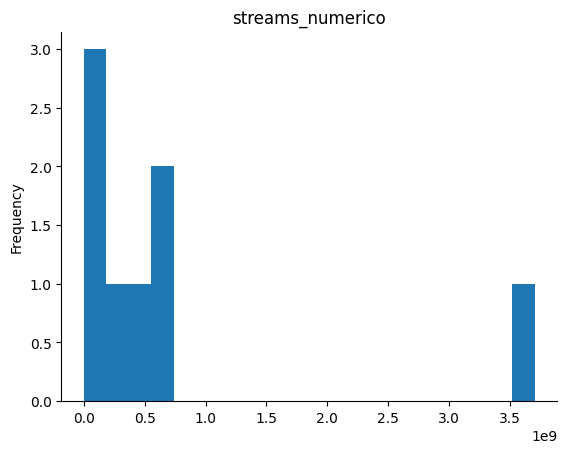

In [ ]:
from matplotlib import pyplot as plt
_df_0['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

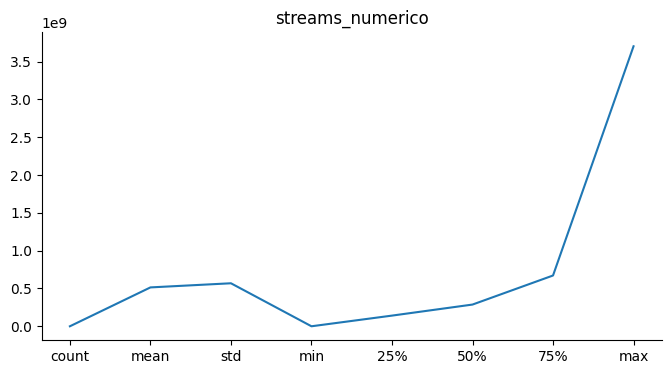

In [ ]:
from matplotlib import pyplot as plt
_df_1['streams_numerico'].plot(kind='line', figsize=(8, 4), title='streams_numerico')
plt.gca().spines[['top', 'right']].set_visible(False)

Medidas de tendencia central y dispersion por categorias

BPM

Alto

Creamos Query con los datos que necesitamos por categoria

In [ ]:
query = """
SELECT cat_bpm, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_bpm = 'alto'
"""

Ejecutar consulta y convertir resultados en un DataFrame de pandas

In [ ]:
df= client.query(query).to_dataframe()

Tomar filas aleatorias para ver datos en tabla

In [ ]:
sample= df.sample(50)
print(sample)

    cat_bpm  streams_numerico
88     alto         394030335
123    alto        1304313953
141    alto          85924992
148    alto         513643924
194    alto        1449779435
119    alto         783706581
200    alto         246390068
68     alto        1284942608
40     alto         354495408
227    alto          62019074
131    alto         302006641
46     alto         135444283
161    alto         806397070
179    alto         663832097
152    alto         338564981
63     alto         240661097
61     alto         113509496
126    alto          24975653
145    alto          30343206
36     alto        1410088830
177    alto         775542072
228    alto          56870689
38     alto         147290338
7      alto        1113838873
160    alto        1953533826
42     alto         107255472
173    alto         332506354
30     alto         939844851
206    alto         225259194
50     alto          58890931
221    alto          94005786
166    alto        1302184087
127    alt

Medidas de tendencia central y dispersion de el dataframe

In [ ]:
df.describe()

,streams_numerico
count,236.0
mean,523972665.949153
std,566479139.528419
min,2762.0
25%,152715987.25
50%,292010098.0
75%,637837821.5
max,3703895074.0


from matplotlib import pyplot as plt
_df_2['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['streams_numerico'].plot(kind='line', figsize=(8, 4), title='streams_numerico')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='streams_numerico', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

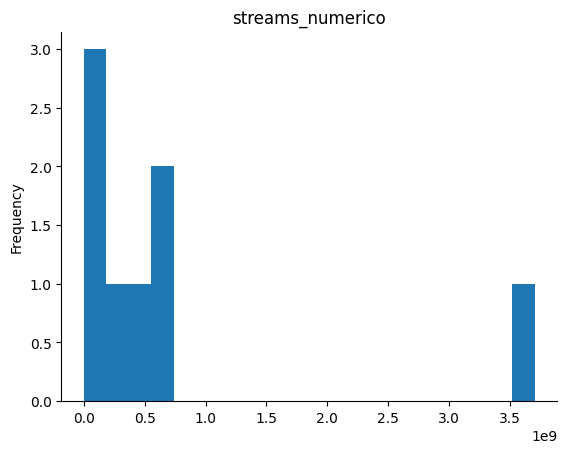

In [ ]:
from matplotlib import pyplot as plt
_df_2['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

BPM

Bajo

In [ ]:
query = """
SELECT cat_bpm, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_bpm = 'bajo'
"""

Ejecutar consulta y convertir resultados en dataframe

In [ ]:
df= client.query(query).to_dataframe()

Medidas de tendencia central y dispersion de el dataframe

In [ ]:
df.describe()

,streams_numerico
count,708.0
mean,510942615.937853
std,570026192.414233
min,1365184.0
25%,138031794.75
50%,286569820.5
75%,674247766.5
max,3562543890.0


from matplotlib import pyplot as plt
_df_6['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['streams_numerico'].plot(kind='line', figsize=(8, 4), title='streams_numerico')
plt.gca().spines[['top', 'right']].set_visible(False)

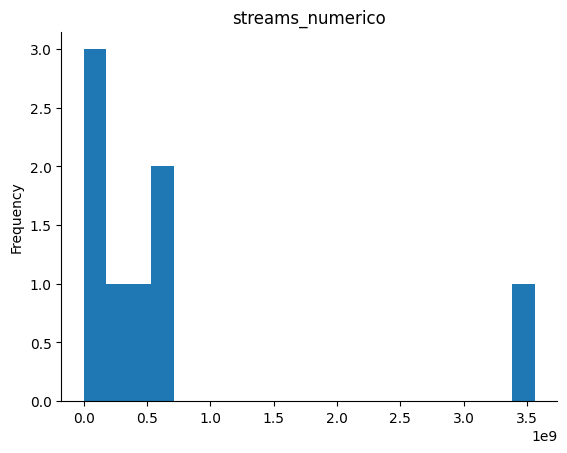

In [ ]:
from matplotlib import pyplot as plt
_df_6['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

Danceability

Alto


Query con los datos que necesitamos para la categoria

In [ ]:
query = """
SELECT cat_danceability, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_danceability = 'alto'
"""

In [ ]:
df= client.query(query).to_dataframe()

In [ ]:
df.describe()

,streams_numerico
count,236.0
mean,424495305.923729
std,482405423.98948
min,1365184.0
25%,137999901.0
50%,251081344.5
75%,542038480.75
max,3562543890.0


from matplotlib import pyplot as plt
_df_0['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['streams_numerico'].plot(kind='line', figsize=(8, 4), title='streams_numerico')
plt.gca().spines[['top', 'right']].set_visible(False)

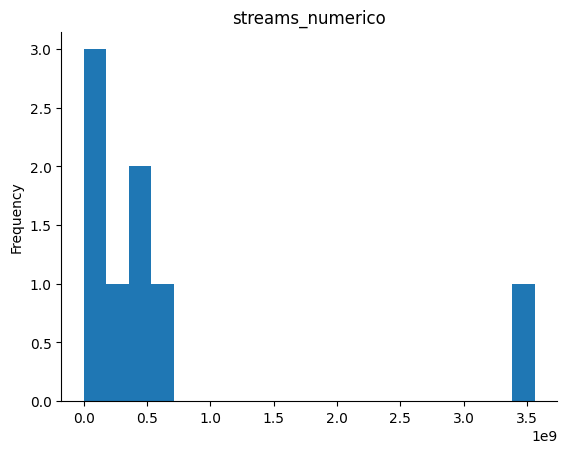

In [ ]:
from matplotlib import pyplot as plt
_df_0['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

Bajo

In [ ]:
query = """
SELECT cat_danceability, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_danceability = 'bajo'
"""

In [ ]:
df= client.query(query).to_dataframe()

In [ ]:
df.describe()

,streams_numerico
count,708.0
mean,544101735.946328
std,592201207.734998
min,2762.0
25%,143204150.0
50%,302621481.5
75%,723777918.5
max,3703895074.0


from matplotlib import pyplot as plt
_df_2['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['streams_numerico'].plot(kind='line', figsize=(8, 4), title='streams_numerico')
plt.gca().spines[['top', 'right']].set_visible(False)

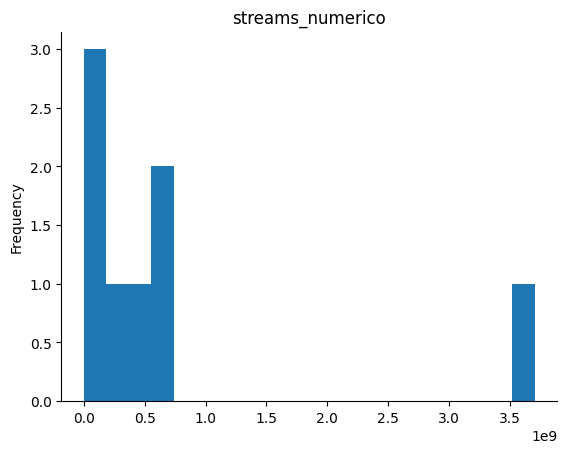

In [ ]:
from matplotlib import pyplot as plt
_df_2['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

Energy

Alto

Query para seleccionar los datos que necesitamos

In [ ]:
query = """
SELECT cat_energy, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_energy = 'alto'
"""

In [ ]:
df= client.query(query).to_dataframe()

In [ ]:
df.describe()

,streams_numerico
count,236.0
mean,497463317.182203
std,571021781.954513
min,11599388.0
25%,135695508.75
50%,264721683.0
75%,595355213.25
max,3703895074.0


from matplotlib import pyplot as plt
_df_4['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['streams_numerico'].plot(kind='line', figsize=(8, 4), title='streams_numerico')
plt.gca().spines[['top', 'right']].set_visible(False)

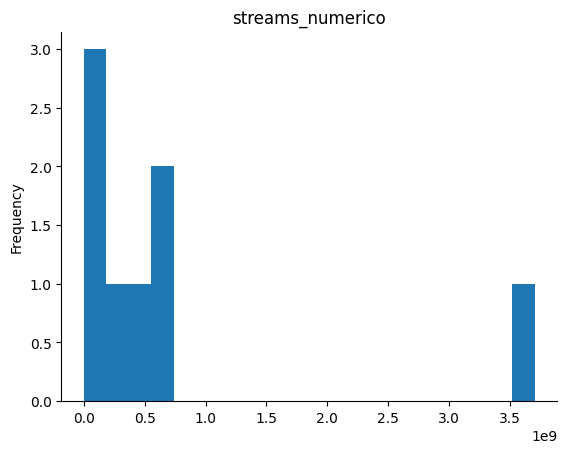

In [ ]:
from matplotlib import pyplot as plt
_df_4['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

Energy Bajo

In [ ]:
query = """
SELECT cat_energy, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_energy = 'bajo'
"""

In [ ]:
df= client.query(query).to_dataframe()

In [ ]:
df.describe()

,streams_numerico
count,708.0
mean,519779065.526836
std,568445374.569031
min,2762.0
25%,144579887.5
50%,295229577.5
75%,674314399.75
max,3562543890.0


from matplotlib import pyplot as plt
_df_6['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['streams_numerico'].plot(kind='line', figsize=(8, 4), title='streams_numerico')
plt.gca().spines[['top', 'right']].set_visible(False)

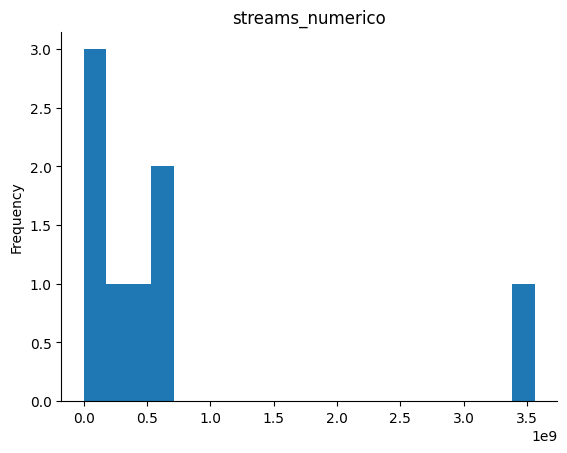

In [ ]:
from matplotlib import pyplot as plt
_df_6['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

Acoustiness

Alto

In [ ]:
query = """
SELECT cat_acoust, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_acoust = 'alto'
"""

In [ ]:
df= client.query(query).to_dataframe()

In [ ]:
df.describe()

,streams_numerico
count,236.0
mean,531516964.961864
std,627414092.821768
min,16011326.0
25%,127432583.75
50%,283107715.0
75%,726093673.5
max,3562543890.0


from matplotlib import pyplot as plt
_df_8['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['streams_numerico'].plot(kind='line', figsize=(8, 4), title='streams_numerico')
plt.gca().spines[['top', 'right']].set_visible(False)

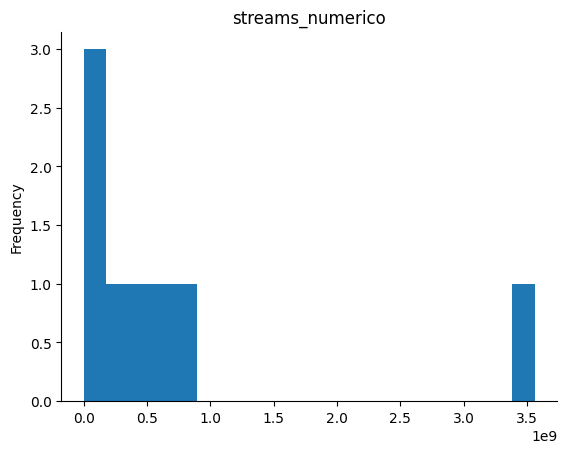

In [ ]:
from matplotlib import pyplot as plt
_df_8['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

Acoustiness

Bajo

In [ ]:
query = """
SELECT cat_acoust, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_acoust = 'bajo'
"""

In [ ]:
df= client.query(query).to_dataframe()

In [ ]:
df.describe()

,streams_numerico
count,708.0
mean,508427849.600282
std,548322493.679222
min,2762.0
25%,145813819.0
50%,291847574.5
75%,655603601.25
max,3703895074.0


from matplotlib import pyplot as plt
_df_10['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['streams_numerico'].plot(kind='line', figsize=(8, 4), title='streams_numerico')
plt.gca().spines[['top', 'right']].set_visible(False)

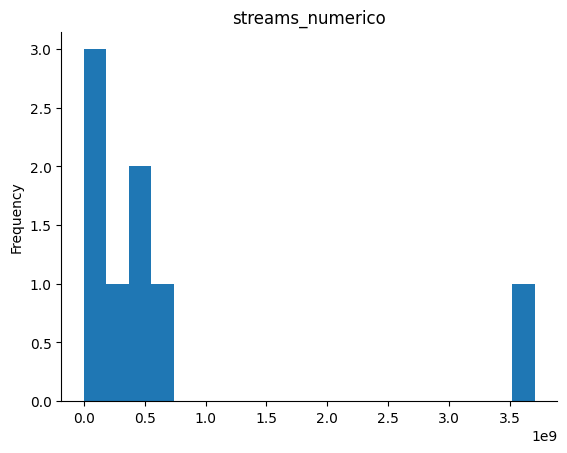

In [ ]:
from matplotlib import pyplot as plt
_df_10['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

Speechiness

Alto

In [32]:
query = """
SELECT cat_speechiness, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_speechiness = 'alto'
"""

In [33]:
df= client.query(query).to_dataframe()

In [34]:
df.describe()

,streams_numerico
count,236.0
mean,412181178.949153
std,448029918.212398
min,11956641.0
25%,128813326.0
50%,245247904.0
75%,508495109.5
max,2565529693.0


from matplotlib import pyplot as plt
_df_12['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['streams_numerico'].plot(kind='line', figsize=(8, 4), title='streams_numerico')
plt.gca().spines[['top', 'right']].set_visible(False)

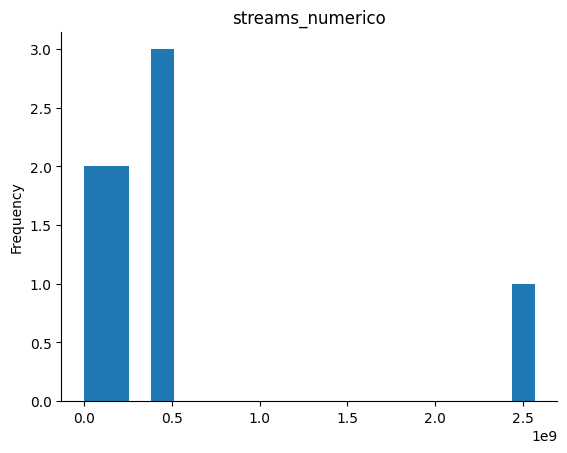

In [35]:
from matplotlib import pyplot as plt
_df_12['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

Speechiness

Bajo

In [36]:
query = """
SELECT cat_speechiness, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_speechiness = 'bajo'
"""

In [37]:
df= client.query(query).to_dataframe()

In [38]:
df.describe()

,streams_numerico
count,708.0
mean,548206444.937853
std,600235560.591657
min,2762.0
25%,144332043.75
50%,305710681.0
75%,722242662.0
max,3703895074.0


from matplotlib import pyplot as plt
_df_14['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['streams_numerico'].plot(kind='line', figsize=(8, 4), title='streams_numerico')
plt.gca().spines[['top', 'right']].set_visible(False)

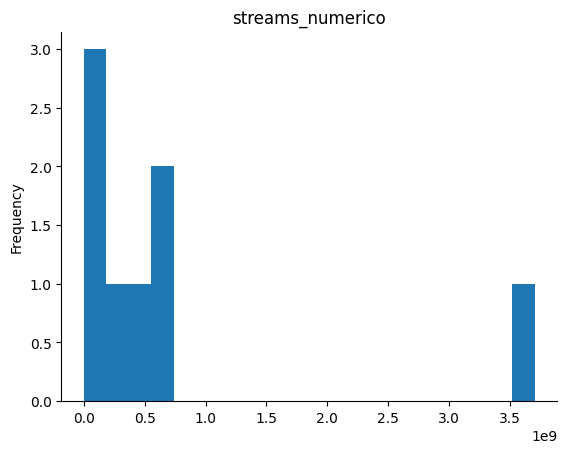

In [39]:
from matplotlib import pyplot as plt
_df_14['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

Instrument

Alto

In [40]:
query = """
SELECT cat_instrument, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_instrument = 'alto'
"""

In [41]:
df= client.query(query).to_dataframe()

In [42]:
df.describe()

,streams_numerico
count,236.0
mean,480526738.758475
std,537740212.692881
min,2762.0
25%,162200744.5
50%,286800590.0
75%,571294545.5
max,3703895074.0


from matplotlib import pyplot as plt
_df_16['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['streams_numerico'].plot(kind='line', figsize=(8, 4), title='streams_numerico')
plt.gca().spines[['top', 'right']].set_visible(False)

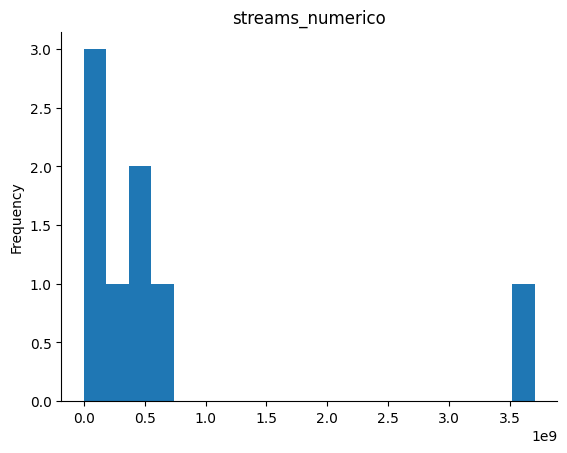

In [43]:
from matplotlib import pyplot as plt
_df_16['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

Instrument

Bajo

In [44]:
query = """
SELECT cat_instrument, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_instrument = 'bajo'
"""

In [45]:
df= client.query(query).to_dataframe()

In [46]:
df.describe()

,streams_numerico
count,708.0
mean,525424591.668079
std,578805495.149547
min,11599388.0
25%,135353000.25
50%,288753739.5
75%,691209901.25
max,3562543890.0


from matplotlib import pyplot as plt
_df_18['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['streams_numerico'].plot(kind='line', figsize=(8, 4), title='streams_numerico')
plt.gca().spines[['top', 'right']].set_visible(False)

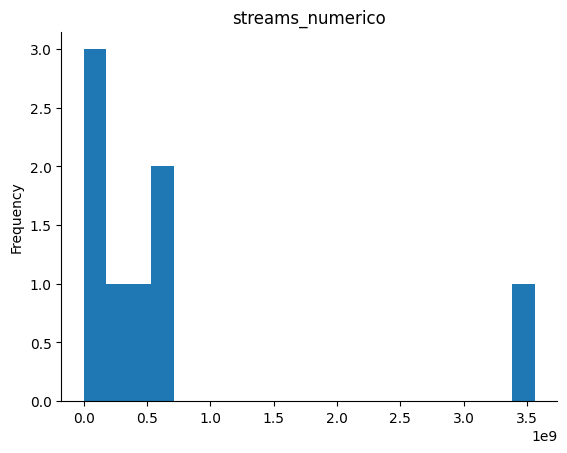

In [47]:
from matplotlib import pyplot as plt
_df_18['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

Liveness

Alto

In [51]:
query = """
SELECT cat_liveness, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_liveness = 'alto'
"""

In [52]:
df= client.query(query).to_dataframe()

In [53]:
df.describe()

,streams_numerico
count,236.0
mean,488424806.033898
std,540383021.978798
min,1365184.0
25%,126658573.5
50%,256917571.5
75%,597580022.75
max,2713922350.0


from matplotlib import pyplot as plt
_df_22['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['streams_numerico'].plot(kind='line', figsize=(8, 4), title='streams_numerico')
plt.gca().spines[['top', 'right']].set_visible(False)

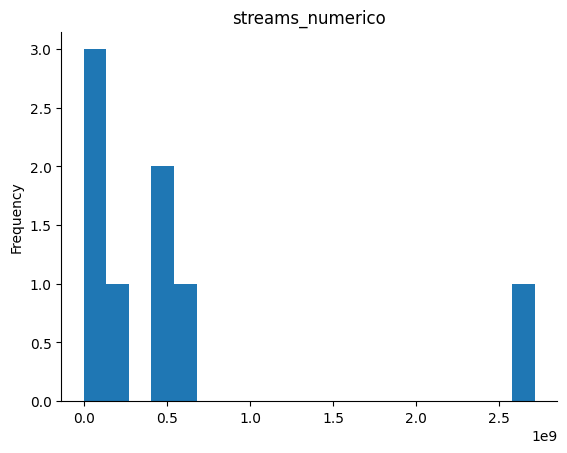

In [58]:
from matplotlib import pyplot as plt
_df_22['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

Liveness

Bajo

In [54]:
query = """
SELECT cat_liveness, streams_numerico
FROM `labproyecto2-hipotesis.Dataset.vista_quartiles_categoria`
WHERE cat_liveness = 'bajo'
"""

In [55]:
df= client.query(query).to_dataframe()

In [56]:
df.describe()

,streams_numerico
count,708.0
mean,522791902.576271
std,578167540.632326
min,2762.0
25%,147476812.75
50%,293909333.5
75%,674839569.25
max,3703895074.0


from matplotlib import pyplot as plt
_df_20['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['streams_numerico'].plot(kind='line', figsize=(8, 4), title='streams_numerico')
plt.gca().spines[['top', 'right']].set_visible(False)

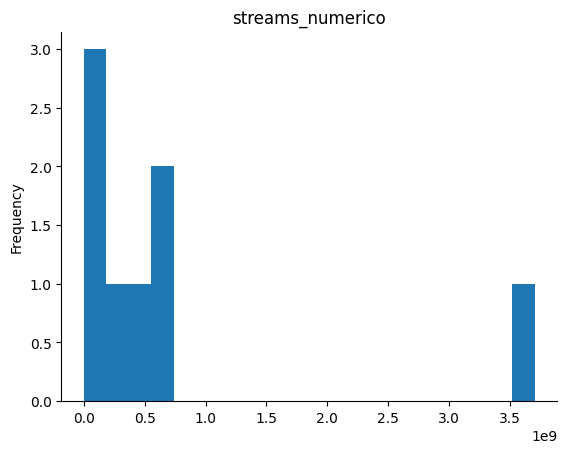

In [57]:
from matplotlib import pyplot as plt
_df_20['streams_numerico'].plot(kind='hist', bins=20, title='streams_numerico')
plt.gca().spines[['top', 'right',]].set_visible(False)